# Section9 SVM

## SVM

SVM
- sklearn.svm.SVC
    - C: エラーの正則化項の係数
    - kernal: 使用するカーネル（{'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}）、デフォルトは'rbf'
    - degree: 'poly'のｄ（デフォルトは3）
    - gamma: 'poly', 'rbf', 'sigmoid'の係数γ
    - .support_vectors_でサポートベクトルのリストを取得
- 回帰はsklearn.svm.SVR

In [57]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [31]:
# データ準備
df = sns.load_dataset('iris')
y_col = 'species'
X = df.drop(columns=[y_col])
y = df[y_col]

# train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 標準化
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# PCA
pca = PCA(n_components=2)
X_train_pc = pca.fit_transform(X_train)
X_test_pc = pca.transform(X_test)

In [39]:
# 学習
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train_pc, y_train)

# 予測
y_pred = model.predict(X_test_pc)

# 評価
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9111111111111111

In [40]:
# サポートベクトル
model.support_vectors_

array([[-2.01808086, -2.16076222],
       [-1.83691058,  0.22264198],
       [ 0.68991796,  0.71639709],
       [ 1.01841242,  0.75406273],
       [ 1.14259734,  0.50582016],
       [-0.59799672, -1.47307272],
       [ 1.00108719, -1.69126085],
       [ 0.21435381, -1.74582022],
       [ 0.76807504,  0.17465618],
       [ 0.58546256, -0.11934379],
       [-0.65005847, -1.76724016],
       [ 0.78292811,  0.42709078],
       [ 1.05347893, -1.00878745],
       [ 1.24654811,  0.22456375],
       [ 0.8060938 , -0.04480644],
       [ 0.67115053,  0.36047773],
       [ 0.83577732, -1.44733591],
       [ 1.36078095,  0.15396725],
       [ 1.18175475, -0.56575389],
       [ 0.9792362 , -0.36356179],
       [ 0.21142607, -1.52270906],
       [ 1.01399725, -0.74821922],
       [ 0.86207563, -0.06985412],
       [ 1.28474342,  0.5928925 ],
       [ 1.326855  ,  0.92380604],
       [ 1.08677516, -1.21143932],
       [ 0.82552169, -0.03239705],
       [ 1.52725209,  0.96532955],
       [ 1.01399725,

## 決定境界とサポートベクトルの可視化

/opt/anaconda3/lib/python3.8/site-packages/sklearn/inspection/_plot/decision_boundary.py:186: UserWarning: The following kwargs were not used by contour: 'x_labes', 'y_lable'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


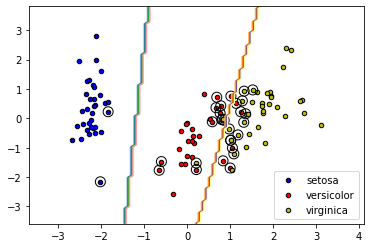

In [76]:
from sklearn.inspection import DecisionBoundaryDisplay

# 決定境界
DecisionBoundaryDisplay.from_estimator(model, 
                                       X_train_pc,
                                       plot_method='contour',
                                       cmap=plt.cm.Paired,
                                       x_labes='first principal component',
                                       y_lable='second principal component'
                                       )  

# setosa, versicolor, virginicaの散布図
for class_, color in zip(model.classes_, 'bry'):
    idx = np.where(y_train == class_)
    plt.scatter(x=X_train_pc[idx, 0],
                y=X_train_pc[idx, 1],
                c=color,
                label=class_,
                edgecolor='black',
                s=20
                )

# サポートベクトルの描画
plt.scatter(x=model.support_vectors_[:, 0],
            y=model.support_vectors_[:, 1],
            s=100,
            facecolor='none',
            linewidth=1,
            edgecolor='black'
           )

plt.legend()

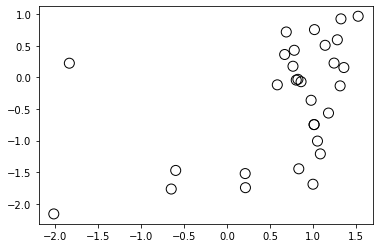

In [75]:
plt.scatter(x=model.support_vectors_[:, 0],
            y=model.support_vectors_[:, 1],
            s=100,
            facecolor='none',
            linewidth=1,
            edgecolor='black'
           )

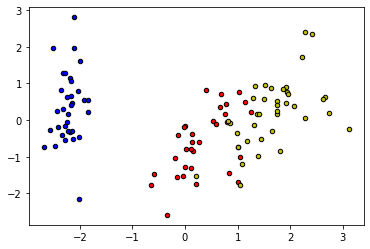

In [69]:
# setosa, versicolor, virginicaの散布図
for class_, color in zip(model.classes_, 'bry'):
    idx = np.where(y_train == class_)
    plt.scatter(x=X_train_pc[idx, 0],
                y=X_train_pc[idx, 1],
                c=color,
                label=class_,
                edgecolor='black',
                s=20
                )

In [60]:
for class_, color in zip(model.classes_, 'bry'):
    print(f'{class_}, {color}')

setosa, b
versicolor, r
virginica, y


In [59]:
np.where(y_train == 'versicolor')

(array([  0,   5,   7,   8,  13,  15,  18,  19,  20,  21,  26,  29,  32,
         34,  36,  57,  63,  64,  67,  70,  72,  82,  83,  84,  87,  88,
         90,  94,  95,  96,  97, 102]),)

In [62]:
X_train_pc[idx, 0]

array([[-2.18190139, -2.18677975, -2.67914189, -1.9206272 , -2.1193603 ,
        -2.33725727, -2.43565041, -2.27443335, -2.3233663 , -2.32141948,
        -2.01808086, -2.13931162, -2.57175686, -2.3569887 , -2.17536094,
        -2.4787448 , -2.00563209, -2.24912357, -2.15317997, -2.14125844,
        -2.23623994, -1.83691058, -1.8383773 , -2.5079256 , -2.11741538,
        -2.28224135, -2.28976652, -2.21747061, -2.01267716, -2.16997986,
        -2.03632485, -2.16197269, -2.2269426 , -2.41640098]])

## パラメータ可変し決定境界を見る

### Linear

/opt/anaconda3/lib/python3.8/site-packages/sklearn/inspection/_plot/decision_boundary.py:186: UserWarning: The following kwargs were not used by contour: 'x_labes', 'y_lable'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


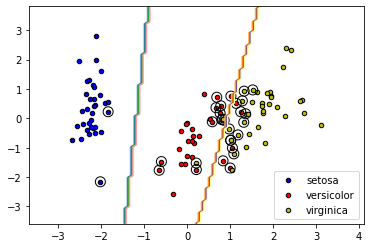

In [88]:
# 学習
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train_pc, y_train)


# 決定境界
DecisionBoundaryDisplay.from_estimator(model, 
                                       X_train_pc,
                                       plot_method='contour',
                                       cmap=plt.cm.Paired,
                                       x_labes='first principal component',
                                       y_lable='second principal component'
                                       )  

# PCA後のsetosa, versicolor, virginicaの散布図
for class_, color in zip(model.classes_, 'bry'):
    idx = np.where(y_train == class_)
    plt.scatter(x=X_train_pc[idx, 0],
                y=X_train_pc[idx, 1],
                c=color,
                label=class_,
                edgecolor='black',
                s=20
                )

# サポートベクトルの描画
plt.scatter(x=model.support_vectors_[:, 0],
            y=model.support_vectors_[:, 1],
            s=100,
            facecolor='none',
            linewidth=1,
            edgecolor='black'
           )

plt.legend()

### Polynominal(多項式), C=1

/opt/anaconda3/lib/python3.8/site-packages/sklearn/inspection/_plot/decision_boundary.py:186: UserWarning: The following kwargs were not used by contour: 'x_labes', 'y_lable'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


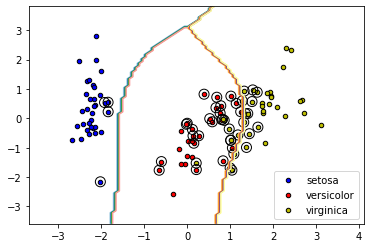

In [86]:
# 学習
from sklearn.svm import SVC
model = SVC(kernel='poly', C=1)
model.fit(X_train_pc, y_train)

# 決定境界
DecisionBoundaryDisplay.from_estimator(model, 
                                       X_train_pc,
                                       plot_method='contour',
                                       cmap=plt.cm.Paired,
                                       x_labes='first principal component',
                                       y_lable='second principal component'
                                       )  

# PCA後のsetosa, versicolor, virginicaの散布図
for class_, color in zip(model.classes_, 'bry'):
    idx = np.where(y_train == class_)
    plt.scatter(x=X_train_pc[idx, 0],
                y=X_train_pc[idx, 1],
                c=color,
                label=class_,
                edgecolor='black',
                s=20
                )

# サポートベクトルの描画
plt.scatter(x=model.support_vectors_[:, 0],
            y=model.support_vectors_[:, 1],
            s=100,
            facecolor='none',
            linewidth=1,
            edgecolor='black'
           )

plt.legend()

### Polynominal(多項式), C=100

In [ ]:
# Cが大きい方がマージンが小さくなって、サポートベクトルの数も少なくなっている

/opt/anaconda3/lib/python3.8/site-packages/sklearn/inspection/_plot/decision_boundary.py:186: UserWarning: The following kwargs were not used by contour: 'x_labes', 'y_lable'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


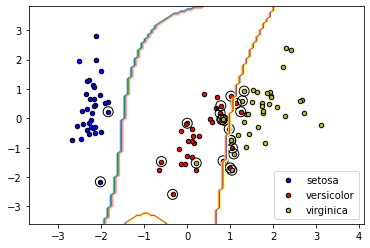

In [87]:
# 学習
from sklearn.svm import SVC
model = SVC(kernel='poly',C=100)
model.fit(X_train_pc, y_train)

# 決定境界
DecisionBoundaryDisplay.from_estimator(model, 
                                       X_train_pc,
                                       plot_method='contour',
                                       cmap=plt.cm.Paired,
                                       x_labes='first principal component',
                                       y_lable='second principal component'
                                       )  

# PCA後のsetosa, versicolor, virginicaの散布図
for class_, color in zip(model.classes_, 'bry'):
    idx = np.where(y_train == class_)
    plt.scatter(x=X_train_pc[idx, 0],
                y=X_train_pc[idx, 1],
                c=color,
                label=class_,
                edgecolor='black',
                s=20
                )

# サポートベクトルの描画
plt.scatter(x=model.support_vectors_[:, 0],
            y=model.support_vectors_[:, 1],
            s=100,
            facecolor='none',
            linewidth=1,
            edgecolor='black'
           )

plt.legend()